# NORMAL TRAINING RELU

In [1]:
activation_functions = []
avg_image_inference_time = []

## Setting up Environment

In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

## Preparing Dataset (ReLU - Normal)

In [4]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('C:\\Users\\sergi\\Desktop\\Issue#4003-PySyft\\files', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('C:\\Users\\sergi\\Desktop\\Issue#4003-PySyft\\files', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [5]:
import os
os.getcwd()

'C:\\Users\\sergi\\Desktop\\Issue#4003-PySyft'

In [6]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [7]:
example_data.shape

torch.Size([1000, 1, 28, 28])

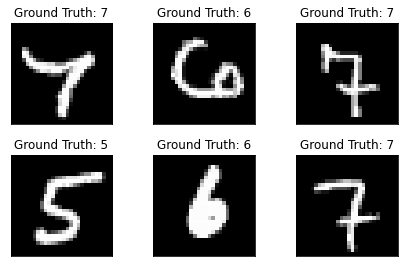

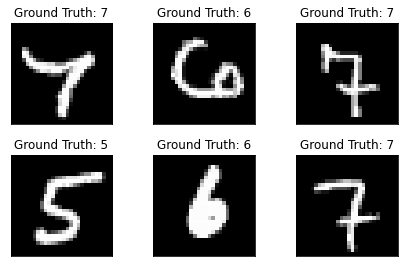

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

## Building the Network (ReLU - Normal)

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(input=x)

In [10]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

## Training the Model

In [11]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [12]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      #torch.save(network.state_dict(), '\results\model.pth')
      #torch.save(optimizer.state_dict(), '\results\optimizer.pth')

In [13]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [14]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

C:\Users\sergi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
C:\Users\sergi\Anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 2.3004, Accuracy: 751/10000 (8%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.268458
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.268337
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.274000
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.251669
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.236826
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.223578
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.153440
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.096371
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.974112
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.944348
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.839604
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.765901
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.699960
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.691150
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.509484
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.395923
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.286211
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.321333
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.273633
Train Epoch: 1 [12160/6

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.393788
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.458176
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.438005
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.424725
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.268167
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.273956
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.502127
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.348544
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.373521
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.302535
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.287468
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.434851
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.187226
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.387121
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.393638
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.286228
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.311356
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.381670
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.655527
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.330530


In [15]:
torch.save(network.state_dict(), 'results\model.pth')
torch.save(optimizer.state_dict(), 'results\optimizer.pth')

## Time Inference (Normal + ReLU)

In [16]:
# 100 samples of test images
inference_test_data = example_data[:100]
inference_test_data.shape

torch.Size([100, 1, 28, 28])

In [18]:
from time import perf_counter

with torch.no_grad():
    t1_start = perf_counter()
    output = network(inference_test_data)
    inference_time_on_100_images = perf_counter() - t1_start

inference_time_on_100_images
print(f"Average inference time for Normal training, using ReLU activation:{inference_time_on_100_images / 100} s")
activation_functions.append('ReLU')
avg_image_inference_time.append(inference_time_on_100_images / 100)

Average inference time for Normal training, using ReLU activation:0.00020682099999987712 ms


C:\Users\sergi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


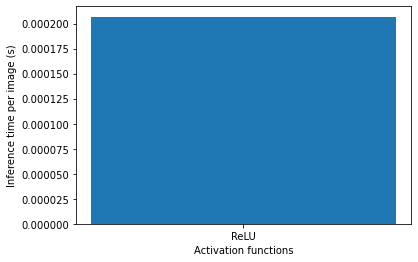

In [49]:
fig, ax = plt.subplots()
ax.bar(x=activation_functions, height=avg_image_inference_time)
ax.set_xlabel('Activation functions')
ax.set_ylabel('Inference time per image (s)')
plt.show()

In [21]:
print(activation_functions)
print(avg_image_inference_time)

['ReLU']
[0.00020682099999987712]


# SMCP TRAINING RELU

## Setting up environment

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [25]:
import syft as sy  # <-- NEW: import the Pysyft library
hook = sy.TorchHook(torch)  # <-- NEW: hook PyTorch ie add extra functionalities to support Federated Learning
bob = sy.VirtualWorker(hook, id="bob")  # <-- NEW: define remote worker bob
alice = sy.VirtualWorker(hook, id="alice")  # <-- NEW: and alice

Falling back to insecure randomness since the required custom op could not be found for the installed version of TensorFlow. Fix this by compiling custom ops. Missing file was 'C:\Users\sergi\Anaconda3\lib\site-packages\tf_encrypted/operations/secure_random/secure_random_module_tf_1.15.3.so'


In [26]:
epochs = 3
class Arguments():
    def __init__(self):
        self.batch_size = 64
        self.test_batch_size = 1000
        self.epochs = epochs
        self.lr = 0.01
        self.momentum = 0.5
        self.no_cuda = False
        self.seed = 1
        self.log_interval = 30
        self.save_model = False

args = Arguments()

use_cuda = not args.no_cuda and torch.cuda.is_available()

torch.manual_seed(args.seed)

device = torch.device("cuda" if use_cuda else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

## Preparing Dataset (SMCP - ReLU)

In [28]:
federated_train_loader = sy.FederatedDataLoader( # <-- this is now a FederatedDataLoader 
    datasets.MNIST('C:\\Users\\sergi\\Desktop\\Issue#4003-PySyft\\files\\data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
    .federate((bob, alice)), # <-- NEW: we distribute the dataset across all the workers, it's now a FederatedDataset
    batch_size=args.batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('C:\\Users\\sergi\\Desktop\\Issue#4003-PySyft\\files\\data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args.test_batch_size, shuffle=True, **kwargs)

Extracting C:\Users\sergi\Desktop\Issue#4003-PySyft\files\data\MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\sergi\Desktop\Issue#4003-PySyft\files\data\MNIST\raw


Extracting C:\Users\sergi\Desktop\Issue#4003-PySyft\files\data\MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\sergi\Desktop\Issue#4003-PySyft\files\data\MNIST\raw


Extracting C:\Users\sergi\Desktop\Issue#4003-PySyft\files\data\MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\sergi\Desktop\Issue#4003-PySyft\files\data\MNIST\raw


Extracting C:\Users\sergi\Desktop\Issue#4003-PySyft\files\data\MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\sergi\Desktop\Issue#4003-PySyft\files\data\MNIST\raw
Processing...
Done!






## Building the Network (ReLU - SMCP)

In [32]:
def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 20, 5, 1)
    self.conv2 = nn.Conv2d(20, 50, 5, 1)
    self.fc1 = nn.Linear(4*4*50, 500)
    self.fc2 = nn.Linear(500, 10)

def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = x.view(-1, 4*4*50)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.log_softmax(x, dim=1)

## Define train and test functions

In [33]:
def train(args, model, device, federated_train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(federated_train_loader): # <-- now it is a distributed dataset
        model.send(data.location) # <-- NEW: send the model to the right location
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        model.get() # <-- NEW: get the model back
        if batch_idx % args.log_interval == 0:
            loss = loss.get() # <-- NEW: get the loss back
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * args.batch_size, len(federated_train_loader) * args.batch_size,
                100. * batch_idx / len(federated_train_loader), loss.item()))

In [35]:
def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(1, keepdim=True) # get the index of the max log-probability 
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [36]:
%%time
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=args.lr) # TODO momentum is not supported at the moment

for epoch in range(1, args.epochs + 1):
    train(args, model, device, federated_train_loader, optimizer, epoch)
    test(args, model, device, test_loader)

if (args.save_model):
    torch.save(model.state_dict(), "mnist_cnn.pt")

C:\Users\sergi\Anaconda3\lib\site-packages\syft\frameworks\torch\tensors\interpreters\native.py:401: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  response = command_method(*args_, **kwargs_)


Train Epoch: 1 [0/60032 (0%)]	Loss: 2.322713
Train Epoch: 1 [1920/60032 (3%)]	Loss: 2.270324
Train Epoch: 1 [3840/60032 (6%)]	Loss: 2.260436
Train Epoch: 1 [5760/60032 (10%)]	Loss: 2.228289
Train Epoch: 1 [7680/60032 (13%)]	Loss: 2.122343
Train Epoch: 1 [9600/60032 (16%)]	Loss: 2.112478
Train Epoch: 1 [11520/60032 (19%)]	Loss: 1.769311
Train Epoch: 1 [13440/60032 (22%)]	Loss: 1.792582
Train Epoch: 1 [15360/60032 (26%)]	Loss: 1.675897
Train Epoch: 1 [17280/60032 (29%)]	Loss: 1.338713
Train Epoch: 1 [19200/60032 (32%)]	Loss: 1.281138
Train Epoch: 1 [21120/60032 (35%)]	Loss: 1.031008
Train Epoch: 1 [23040/60032 (38%)]	Loss: 1.137201
Train Epoch: 1 [24960/60032 (42%)]	Loss: 1.190476
Train Epoch: 1 [26880/60032 (45%)]	Loss: 0.953692
Train Epoch: 1 [28800/60032 (48%)]	Loss: 0.930310
Train Epoch: 1 [30720/60032 (51%)]	Loss: 0.884563
Train Epoch: 1 [32640/60032 (54%)]	Loss: 0.704290
Train Epoch: 1 [34560/60032 (58%)]	Loss: 0.923742
Train Epoch: 1 [36480/60032 (61%)]	Loss: 0.814103
Train Epoch:

In [47]:
def test_100(args, model, device, test_loader):
    model.eval()
    iter = 0;
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(1, keepdim=True) # get the index of the max log-probability 
            correct += pred.eq(target.view_as(pred)).sum().item()
            iter += 1
            if (iter == 100):
                break

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [48]:
from time import perf_counter

t1_start = perf_counter()
test_100(args, model, device, test_loader)
inference_time_on_100_images = perf_counter() - t1_start
inference_time_on_100_images

C:\Users\sergi\Anaconda3\lib\site-packages\syft\frameworks\torch\tensors\interpreters\native.py:401: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  response = command_method(*args_, **kwargs_)



Test set: Average loss: 0.1389, Accuracy: 9561/10000 (96%)



3.132991700000048

In [50]:
activation_functions.append('ReLU SMCP')
avg_image_inference_time.append(inference_time_on_100_images / 100)

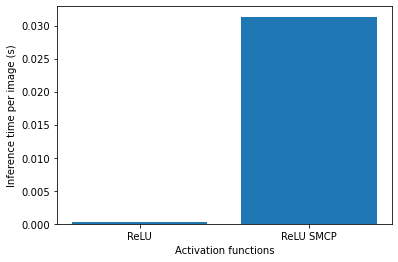

In [57]:
fig, ax = plt.subplots()
ax.bar(x=activation_functions, height=avg_image_inference_time)
ax.set_xlabel('Activation functions')
ax.set_ylabel('Inference time per image (s)')
plt.show()
fig.savefig('ReLU vs Relu SMCP.jpg', dpi=100)